In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
#engine = create_engine("sqlite:///hawaii.sqlite")
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
inspector = inspect(engine)
#inspector

In [7]:
# View all of the classes that automap found
inspector.get_table_names()

['measurement', 'station']

In [8]:
# Save references to each table
Station = Base.classes.station
Measurement = Base.classes.measurement

In [9]:
type(Measurement)

sqlalchemy.ext.declarative.api.DeclarativeMeta

In [10]:
# Create our session (link) froDow = Base.classes.dowm Python to the DB
session = Session(engine)

In [11]:
columns = inspector.get_columns('measurement')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [12]:
columns = inspector.get_columns('station')
for column in columns:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Precipitation Analysis

In [13]:
# Find the most recent date in the data set.
start_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
start_date

('2017-08-23')

In [14]:
year_ago3 = dt.date(2017, 8, 23) - dt.timedelta(days = 364)
print("Date one year ago is: ", year_ago3 )

Date one year ago is:  2016-08-24


In [15]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

precipitation_12 = session.query(Measurement.station, Measurement.date, Measurement.prcp).\
filter(Measurement.date >= '2016-08-24').filter(Measurement.date <= '2017-08-23').order_by(Measurement.date).all()

#Display
#precipitation_12

In [16]:
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column
per_df = pd.DataFrame(precipitation_12)



per_df.head()


,station,date,prcp
0,USC00519397,2016-08-24,0.08
1,USC00513117,2016-08-24,2.15
2,USC00514830,2016-08-24,2.28
3,USC00517948,2016-08-24,NaN
4,USC00519523,2016-08-24,1.22


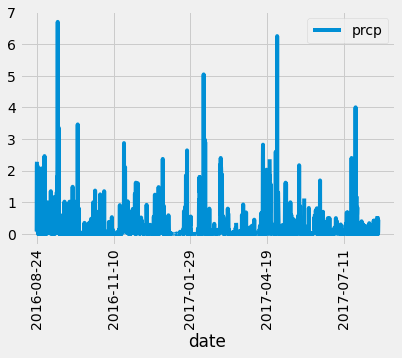

In [17]:
# Sort the dataframe by date

per_df.plot(x = 'date', y = 'prcp', rot = 90 )

In [18]:
# Sort the dataframe by date

In [19]:
# Use Pandas to calcualte the summary statistics for the precipitation data
per_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [20]:
# Design a query to calculate the total number stations in the dataset

no_stations = session.query(func.count(Station.station)).all()
print(f"There are {no_stations} number of stations")


There are [(9,)] number of stations


In [21]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

station_max = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

station_max

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
type(station_max)

list

In [23]:
#create DataFrame using data 
df = pd.DataFrame(station_max, columns =['station', 'count']) 

df

,station,count
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [24]:
max_df = df.loc[df['count'].idxmax()]

max_df.station

'USC00519281'

In [25]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == max_df.station).all()

[(54.0, 85.0, 71.66378066378067)]

In [26]:
last_dt = session.query (Measurement.date).filter(Measurement.station == max_df.station).\
          order_by(Measurement.date.desc()).first()
print("Latest date for station 'USC00519281' is: " ,last_dt )

Latest date for station 'USC00519281' is:  ('2017-08-18',)


In [27]:
temp_active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),\
                      func.avg(Measurement.tobs)).\
                      filter(Measurement.station == max_df.station).all()


print("The Minimum ,Maximum and Average Temp for the most active station is :" , temp_active_station)

The Minimum ,Maximum and Average Temp for the most active station is : [(54.0, 85.0, 71.66378066378067)]


In [28]:
year_ago3 = dt.date(2017, 8, 18) - dt.timedelta(days = 365)
print("Date one year ago is: ", year_ago3 )

Date one year ago is:  2016-08-18


In [29]:
temp = session.query(Measurement.station, Measurement.date, Measurement.tobs)
#filter(Measurement.date >= year_ago3).filter(Measurement.date <= last_dt).order_by(Measurement.date).all()

temp

In [30]:
station_df = pd.DataFrame(temp, columns =['station', 'date', 'tobs']) 

station_df

,station,date,tobs
0,USC00519397,2010-01-01,65.0
1,USC00519397,2010-01-02,63.0
2,USC00519397,2010-01-03,74.0
3,USC00519397,2010-01-04,76.0
4,USC00519397,2010-01-06,73.0
...,...,...,...
19545,USC00516128,2017-08-19,71.0
19546,USC00516128,2017-08-20,78.0
19547,USC00516128,2017-08-21,76.0
19548,USC00516128,2017-08-22,76.0


In [31]:
#type(Measurement)

In [32]:
busy_station = station_df.loc[station_df["station"] == 'USC00519281', :]

print(busy_station)

           station        date  tobs
12187  USC00519281  2010-01-01  70.0
12188  USC00519281  2010-01-02  62.0
12189  USC00519281  2010-01-03  74.0
12190  USC00519281  2010-01-04  75.0
12191  USC00519281  2010-01-05  74.0
...            ...         ...   ...
14954  USC00519281  2017-08-14  77.0
14955  USC00519281  2017-08-15  77.0
14956  USC00519281  2017-08-16  76.0
14957  USC00519281  2017-08-17  76.0
14958  USC00519281  2017-08-18  79.0

[2772 rows x 3 columns]


In [33]:
#type(busy_station)

In [34]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

#The most active station is USC00519281
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == max_df.station).all()

[(54.0, 85.0, 71.66378066378067)]

<function matplotlib.pyplot.show(*args, **kw)>

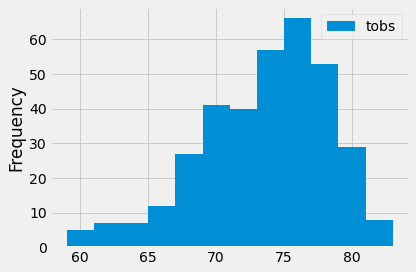

In [35]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station
results = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date >= '2016-08-23').all()

# Plot the results as a histogram
station_high_temp_obs = pd.DataFrame(results, columns=['tobs'])
station_high_temp_obs.plot.hist(bins=12)
plt.tight_layout()
plt.show


# Close session

In [36]:
# Close Session
session.close()

In [37]:
#busy_station.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 12187 to 14958
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   station  2772 non-null   object 
 1   date     2772 non-null   object 
 2   tobs     2772 non-null   float64
dtypes: float64(1), object(2)
memory usage: 86.6+ KB
